In [70]:
from scipy.stats import binom
from scipy.stats import norm
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [71]:
sample_size = 100
eligible_population = [0.26, 0.74]

In [72]:
sample_proportions(sample_size, eligible_population).item(0)

0.36

In [73]:
def one_simulated_count():
    return sample_size * sample_proportions(sample_size, eligible_population).item(0)

In [74]:
counts = make_array()
repetitions = 10000
for i in np.arange(repetitions):
    counts = np.append(counts, one_simulated_count())

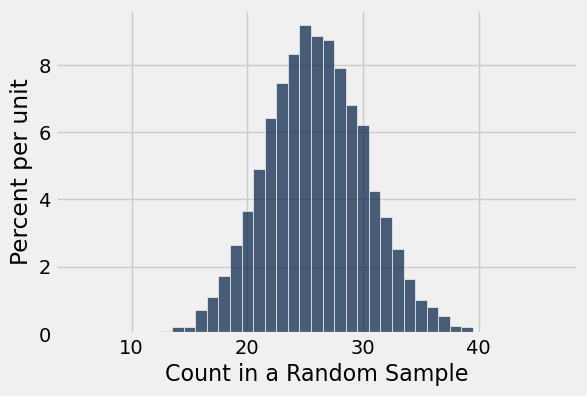

In [75]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))

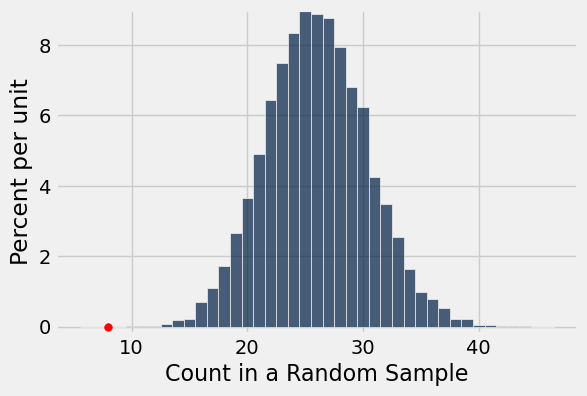

In [76]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))
plt.ylim(-0.002, 0.09)
plt.scatter(8, 0, color='red', s=30);

In [77]:
# Parameter setzen
n = 100  # Anzahl der Personen im Jury-Panel
p = 0.26  # Anteil der Afroamerikaner in der Bevölkerung

# Simulation durchführen
simulated_juries = binom.rvs(n, p, size=10000)

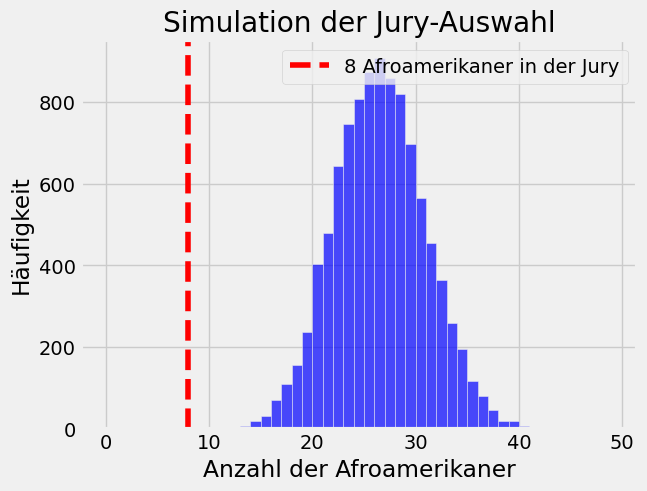

In [78]:
plt.hist(simulated_juries, bins=range(50), color='blue', alpha=0.7)
plt.axvline(x=8, color='red', linestyle='--', label='8 Afroamerikaner in der Jury')
plt.xlabel('Anzahl der Afroamerikaner')
plt.ylabel('Häufigkeit')
plt.title('Simulation der Jury-Auswahl')
plt.legend()
plt.show()

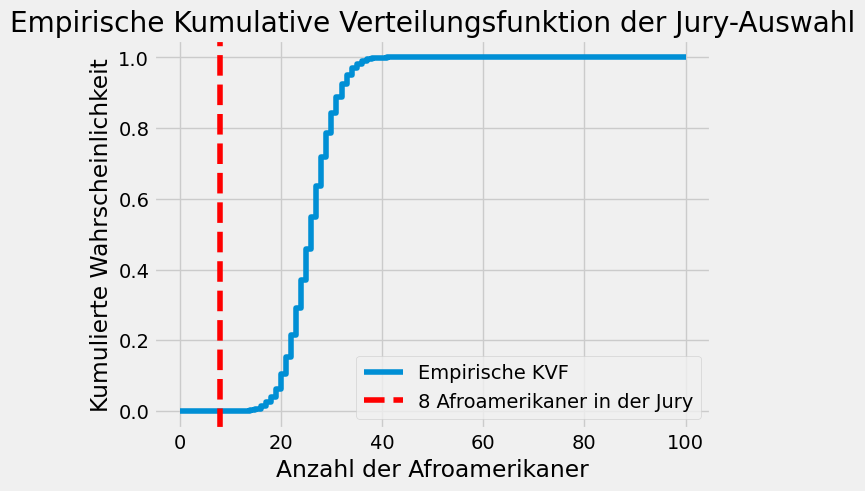

In [79]:
# Empirische kumulative Verteilungsfunktion
cumulative_frequencies = np.cumsum(np.bincount(simulated_juries, minlength=n+1)) / len(simulated_juries)
plt.step(range(n+1), cumulative_frequencies, where='post', label='Empirische KVF')
plt.axvline(x=8, color='red', linestyle='--', label='8 Afroamerikaner in der Jury')
plt.xlabel('Anzahl der Afroamerikaner')
plt.ylabel('Kumulierte Wahrscheinlichkeit')
plt.title('Empirische Kumulative Verteilungsfunktion der Jury-Auswahl')
plt.legend()
plt.show()

In [80]:
# Parameter
n = 100
p = 0.26

# Berechnung der kumulativen Wahrscheinlichkeit für X <= 8
cumulative_prob = binom.cdf(8, n, p)
print(f'Wahrscheinlichkeit, dass X <= 8 ist: {cumulative_prob:.8f}')

Wahrscheinlichkeit, dass X <= 8 ist: 0.00000473


In [81]:
# Parameter
n = 100
p = 0.26
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# Berechnung der kumulativen Wahrscheinlichkeit
prob = norm.cdf(8, mu, sigma)
print(f'Wahrscheinlichkeit, dass X <= 8 ist (approximativ): {prob:.8f}')

Wahrscheinlichkeit, dass X <= 8 ist (approximativ): 0.00002033


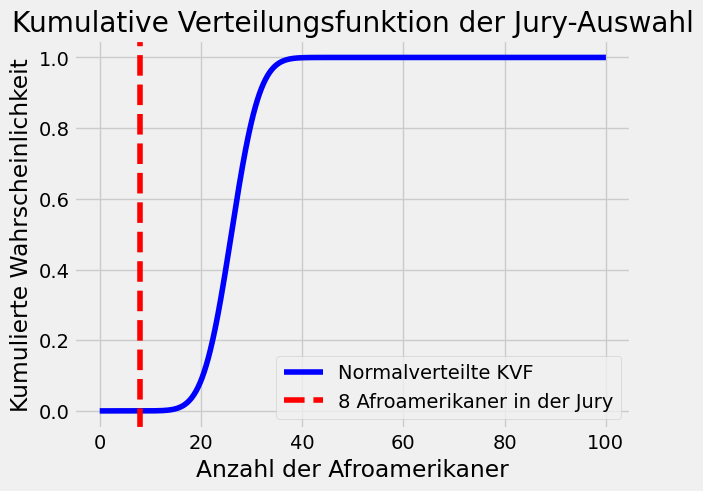

In [82]:
# Parameter
n = 100
p = 0.26
mean = n * p  # Mittelwert der Binomialverteilung
std = np.sqrt(n * p * (1 - p))  # Standardabweichung der Binomialverteilung

# Generieren der x-Werte
x_values = np.linspace(0, n, 1000)
# Berechnen der kumulativen Wahrscheinlichkeiten für die Normalverteilung
cumulative_probabilities = norm.cdf(x_values, mean, std)

# Plot der empirischen kumulativen Verteilungsfunktion (KVF)
plt.plot(x_values, cumulative_probabilities, label='Normalverteilte KVF', color='blue')
plt.axvline(x=8, color='red', linestyle='--', label='8 Afroamerikaner in der Jury')
plt.xlabel('Anzahl der Afroamerikaner')
plt.ylabel('Kumulierte Wahrscheinlichkeit')
plt.title('Kumulative Verteilungsfunktion der Jury-Auswahl')
plt.legend()
plt.grid(True)
plt.show()

In [83]:
# Parameter
n = 100  # Größe des Jury-Panels
p_hat = 26 / 100  # Beobachteter Anteil der Afroamerikaner
z = 1.96  # z-Wert für das 95%-Konfidenzintervall

# Berechnung des Standardfehlers
standard_error = np.sqrt(p_hat * (1 - p_hat) / n)

# Berechnung des Konfidenzintervalls
lower_bound = p_hat - z * standard_error
upper_bound = p_hat + z * standard_error

# Ausgabe des Konfidenzintervalls
print("95%-Konfidenzintervall: ({:.2f}%, {:.2f}%)".format(lower_bound * 100, upper_bound * 100))

95%-Konfidenzintervall: (17.40%, 34.60%)


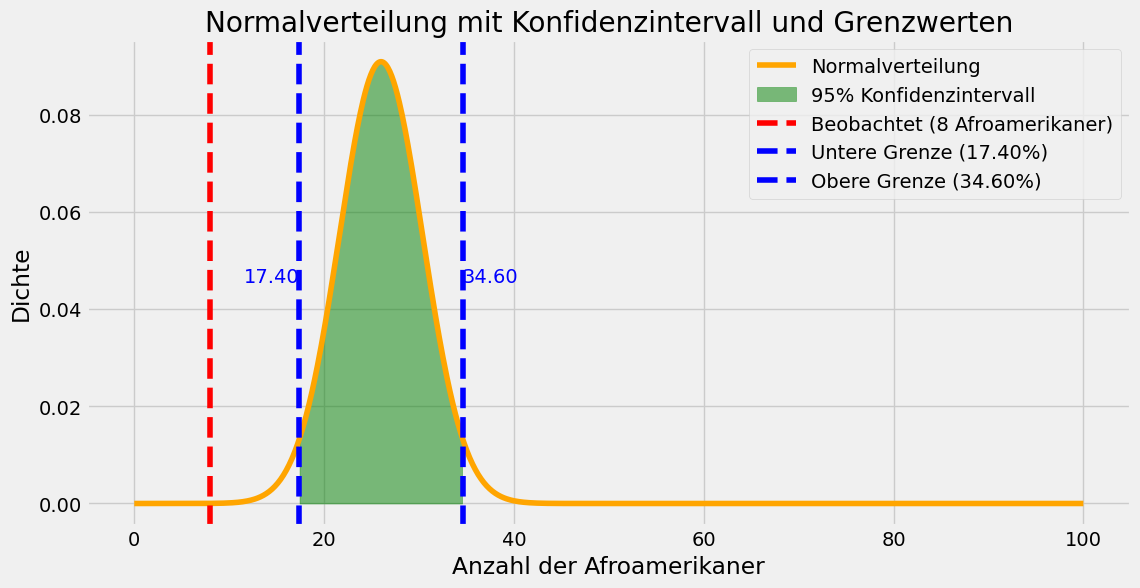

In [84]:
# Parameter
n = 100
p = 0.26  # Erwarteter Anteil der Afroamerikaner
mean = n * p
std = np.sqrt(n * p * (1 - p))

# Generieren der x-Werte für die Normalverteilung
x_values = np.linspace(0, n, 1000)
y_values = norm.pdf(x_values, mean, std)

# Z-Wert für das 95%-Konfidenzintervall
z = 1.96

# Standardfehler des Anteils
standard_error = np.sqrt(p * (1 - p) / n)

# Konfidenzintervall berechnen
lower_bound_expected = p - z * standard_error
upper_bound_expected = p + z * standard_error

# Berechnen der Konfidenzintervall-Grenzen in absolute Werte umgewandelt
lower_bound_absolute = lower_bound_expected * n
upper_bound_absolute = upper_bound_expected * n

# Erstellen der Plot-Figur
fig, ax = plt.subplots(figsize=(12, 6))  # Breiteres Format

# Zeichnen der Normalverteilung
ax.plot(x_values, y_values, label='Normalverteilung', color='orange')

# Einfärben des Konfidenzintervalls
ax.fill_between(x_values, y_values, where=(x_values >= lower_bound_absolute) & (x_values <= upper_bound_absolute), 
                 color='green', alpha=0.5, label='95% Konfidenzintervall')

# Markierung der beobachteten Anzahl Afroamerikaner
ax.axvline(x=8, color='red', linestyle='--', label='Beobachtet (8 Afroamerikaner)')

# Anzeigen der Konfidenzintervall-Grenzen
ax.axvline(x=lower_bound_absolute, color='blue', linestyle='--', label=f'Untere Grenze ({lower_bound_expected*100:.2f}%)')
ax.axvline(x=upper_bound_absolute, color='blue', linestyle='--', label=f'Obere Grenze ({upper_bound_expected*100:.2f}%)')

# Hinzufügen von Text-Labels für die Konfidenzintervall-Grenzen
ax.text(lower_bound_absolute, max(y_values)/2, f'{lower_bound_absolute:.2f}', horizontalalignment='right', color='blue')
ax.text(upper_bound_absolute, max(y_values)/2, f'{upper_bound_absolute:.2f}', horizontalalignment='left', color='blue')

# Zusätzliche Beschriftungen und Legende
ax.set_xlabel('Anzahl der Afroamerikaner')
ax.set_ylabel('Dichte')
ax.set_title('Normalverteilung mit Konfidenzintervall und Grenzwerten')
ax.legend()
ax.grid(True)

# Anzeigen des Plots
plt.show()

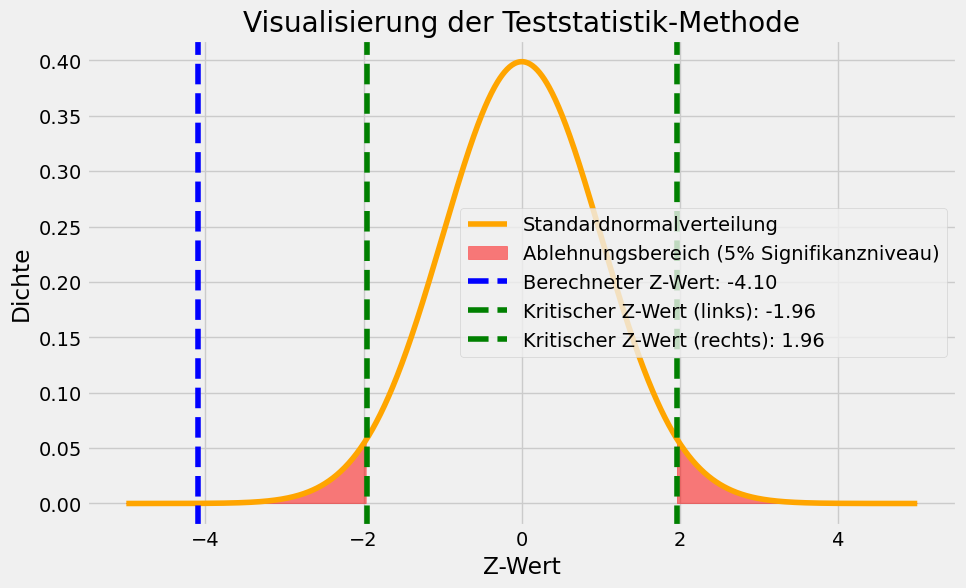

In [85]:
# Z-Wert für das 95%-Konfidenzintervall (zweiseitiger Test)
z_critical = norm.ppf(0.975)  # 97.5% Quantil für zweiseitigen Test
z_value = -4.10  # Ersetzen Sie dies durch den tatsächlich berechneten Z-Wert aus Ihrer Analyse

# Generieren der x-Werte für die Standardnormalverteilung
x_values = np.linspace(-5, 5, 1000)
y_values = norm.pdf(x_values)

# Erstellen der Plot-Figur
fig, ax = plt.subplots(figsize=(10, 6))

# Zeichnen der Standardnormalverteilung
ax.plot(x_values, y_values, label='Standardnormalverteilung', color='orange')

# Einfärben der kritischen Bereiche
ax.fill_between(x_values, y_values, where=(x_values <= -z_critical) | (x_values >= z_critical),
                 color='red', alpha=0.5, label='Ablehnungsbereich (5% Signifikanzniveau)')

# Markierung des berechneten Z-Wertes
ax.axvline(x=z_value, color='blue', linestyle='--', label=f'Berechneter Z-Wert: {z_value:.2f}')

# Markierung der kritischen Z-Werte
ax.axvline(x=-z_critical, color='green', linestyle='--', label=f'Kritischer Z-Wert (links): {-z_critical:.2f}')
ax.axvline(x=z_critical, color='green', linestyle='--', label=f'Kritischer Z-Wert (rechts): {z_critical:.2f}')


# Zusätzliche Beschriftungen und Legende
ax.set_xlabel('Z-Wert')
ax.set_ylabel('Dichte')
ax.set_title('Visualisierung der Teststatistik-Methode')
ax.legend()
ax.grid(True)

# Anzeigen des Plots
plt.show()


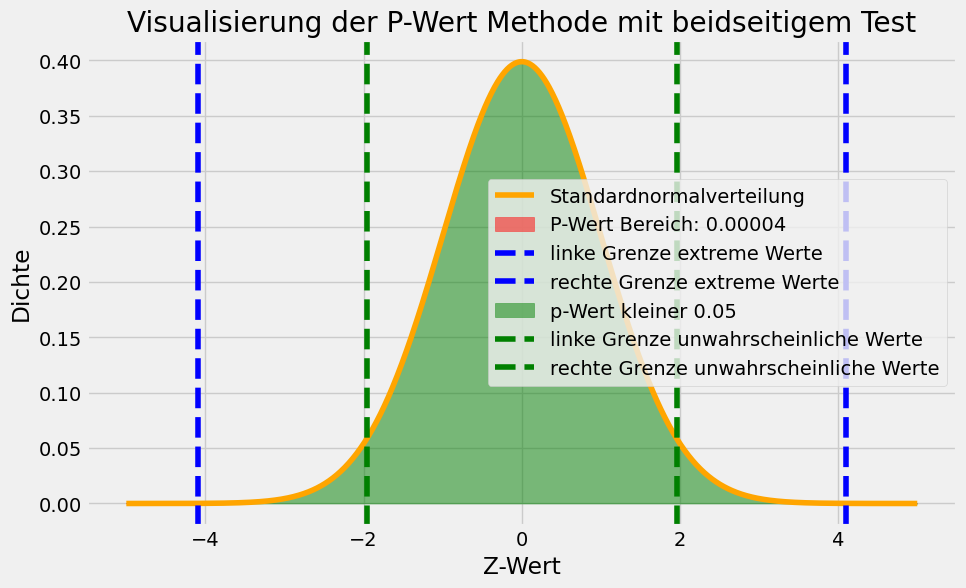

In [86]:
# Z-Wert aus der früheren Analyse
z_value = -4.10  # Berechneter Z-Wert

# Generieren der x-Werte für die Standardnormalverteilung
x_values = np.linspace(-5, 5, 1000)
y_values = norm.pdf(x_values)

# Berechnung des P-Werts für den beidseitigen Test
# Wir nutzen die absolute Form des Z-Wertes, um den symmetrischen P-Wert zu berechnen
p_value_two_sided = 2 * norm.cdf(-abs(z_value))

# Erstellen der Plot-Figur
fig, ax = plt.subplots(figsize=(10, 6))

# Zeichnen der Standardnormalverteilung
ax.plot(x_values, y_values, label='Standardnormalverteilung', color='orange')

# Einfärben der Bereiche, die den P-Wert darstellen
ax.fill_between(x_values, 0, y_values, where=(x_values <= z_value) | (x_values >= -z_value), 
                color='red', alpha=0.5, label=f'P-Wert Bereich: {p_value_two_sided:.5f}')

# Markierung des berechneten Z-Wertes auf beiden Seiten
ax.axvline(x=z_value, color='blue', linestyle='--', label='linke Grenze extreme Werte')
ax.axvline(x=-z_value, color='blue', linestyle='--', label='rechte Grenze extreme Werte')

# Einfärben der Bereiche, die den P-Wert darstellen
ax.fill_between(x_values, 0, y_values, where=(x_values <= z_critical) | (x_values >= -z_critical), 
                color='green', alpha=0.5, label='p-Wert kleiner 0.05')

# Markierung der kritischen Z-Werte
ax.axvline(x=-z_critical, color='green', linestyle='--', label='linke Grenze unwahrscheinliche Werte')
ax.axvline(x=z_critical, color='green', linestyle='--', label='rechte Grenze unwahrscheinliche Werte')

# Zusätzliche Beschriftungen und Legende
ax.set_xlabel('Z-Wert')
ax.set_ylabel('Dichte')
ax.set_title('Visualisierung der P-Wert Methode mit beidseitigem Test')
ax.legend()
ax.grid(True)

# Anzeigen des Plots
plt.show()


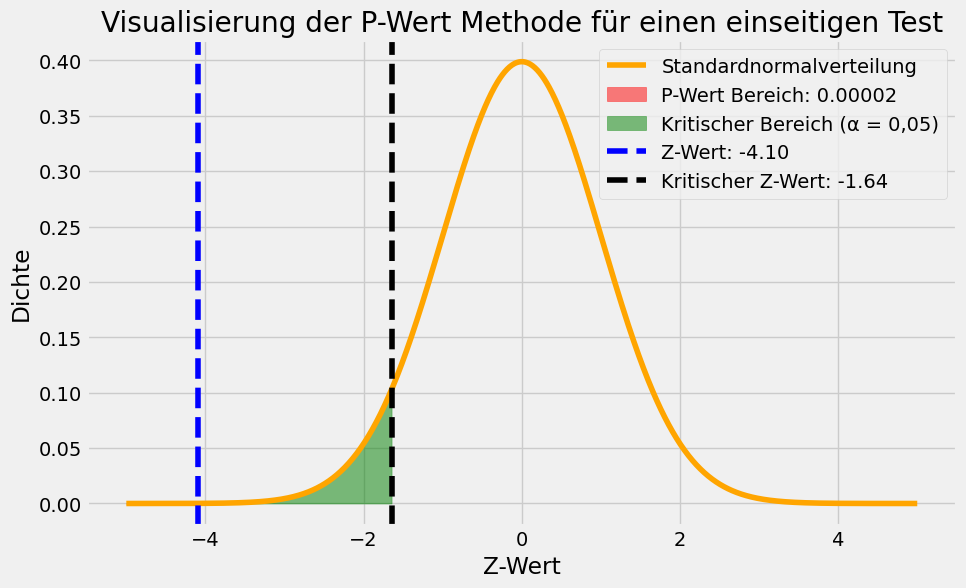

In [87]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Berechneter Z-Wert aus Ihrer Analyse
z_value = -4.10  # Beispielhafter Z-Wert

# Generieren der x-Werte für die Standardnormalverteilung
x_values = np.linspace(-5, 5, 1000)
y_values = norm.pdf(x_values)

# Berechnung des P-Werts für den einseitigen Test (linke Seite)
p_value_one_sided = norm.cdf(z_value)

# Berechnung des kritischen Z-Werts für ein Signifikanzniveau von 0,05 (linke Seite)
z_critical = norm.ppf(0.05)  # Kritischer Z-Wert für 5% Signifikanzniveau auf der linken Seite

# Erstellen der Plot-Figur
fig, ax = plt.subplots(figsize=(10, 6))

# Zeichnen der Standardnormalverteilung
ax.plot(x_values, y_values, label='Standardnormalverteilung', color='orange')

# Einfärben des Bereichs für den P-Wert (linker Tail)
ax.fill_between(x_values, 0, y_values, where=(x_values <= z_value),
                color='red', alpha=0.5, label=f'P-Wert Bereich: {p_value_one_sided:.5f}')

# Einfärben des kritischen Bereichs für das Signifikanzniveau von 0,05 (linke Seite)
ax.fill_between(x_values, 0, y_values, where=(x_values <= z_critical),
                color='green', alpha=0.5, label='Kritischer Bereich (α = 0,05)')

# Markierung des berechneten Z-Wertes
ax.axvline(x=z_value, color='blue', linestyle='--', label=f'Z-Wert: {z_value:.2f}')

# Markierung des kritischen Z-Wertes
ax.axvline(x=z_critical, color='black', linestyle='--', label=f'Kritischer Z-Wert: {z_critical:.2f}')

# Zusätzliche Beschriftungen und Legende
ax.set_xlabel('Z-Wert')
ax.set_ylabel('Dichte')
ax.set_title('Visualisierung der P-Wert Methode für einen einseitigen Test')
ax.legend()
ax.grid(True)

# Anzeigen des Plots
plt.show()
